In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
!wget https://github.com/Dinesh-Adhithya-H/Machine-learning-in-Football/blob/main/GL2018.TXT?raw=true

--2021-06-24 06:39:20--  https://github.com/Dinesh-Adhithya-H/Machine-learning-in-Football/blob/main/GL2018.TXT?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Dinesh-Adhithya-H/Machine-learning-in-Football/raw/main/GL2018.TXT [following]
--2021-06-24 06:39:20--  https://github.com/Dinesh-Adhithya-H/Machine-learning-in-Football/raw/main/GL2018.TXT
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dinesh-Adhithya-H/Machine-learning-in-Football/main/GL2018.TXT [following]
--2021-06-24 06:39:20--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Machine-learning-in-Football/main/GL2018.TXT
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubuserco

Column names and description can be found here : https://www.retrosheet.org/gamelogs/glfields.txt

In [3]:
MLB=pd.read_csv("GL2018.TXT?raw=true",header=None)

In [4]:
MLB.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160
0,20180329,0,Thu,COL,NL,1,ARI,NL,1,2,8,51,N,NaN,NaN,NaN,PHO01,48703,216,100001000,30000320x,33,9,0,0,2,2,1,0,0,2,0,12,0,0,2,0,7,5,8,...,Ian Desmond,3,parrg001,Gerardo Parra,7,iannc001,Chris Iannetta,2,grayj003,Jon Gray,1,perad001,David Peralta,7,polla001,A.J. Pollock,8,goldp001,Paul Goldschmidt,3,lambj001,Jake Lamb,5,martk001,Ketel Marte,4,avila001,Alex Avila,2,ahmen001,Nick Ahmed,6,dysoj001,Jarrod Dyson,9,corbp001,Patrick Corbin,1,NaN,Y
1,20180329,0,Thu,PHI,NL,1,ATL,NL,1,5,8,53,D,NaN,NaN,NaN,ATL03,40208,208,100004000,000002033,31,6,2,0,1,5,0,0,1,6,0,11,1,0,2,0,6,6,7,...,J.P. Crawford,6,franm004,Maikel Franco,5,knapa001,Andrew Knapp,2,nolaa001,Aaron Nola,1,incie001,Ender Inciarte,8,albio001,Ozzie Albies,4,freef001,Freddie Freeman,3,markn001,Nick Markakis,9,flowt001,Tyler Flowers,2,tuckp001,Preston Tucker,7,swand001,Dansby Swanson,6,flahr001,Ryan Flaherty,5,tehej001,Julio Teheran,1,NaN,Y
2,20180329,0,Thu,SFN,NL,1,LAN,NL,1,1,0,54,D,NaN,NaN,NaN,LOS03,53595,175,000010000,000000000,34,8,2,0,1,1,0,0,0,2,0,11,0,0,1,0,8,5,0,...,Hunter Pence,7,beltb001,Brandon Belt,3,crawb001,Brandon Crawford,6,blact002,Ty Blach,1,taylc001,Chris Taylor,8,seagc001,Corey Seager,6,puigy001,Yasiel Puig,9,herne001,Enrique Hernandez,4,bellc002,Cody Bellinger,3,kempm001,Matt Kemp,7,grany001,Yasmani Grandal,2,forsl001,Logan Forsythe,5,kersc001,Clayton Kershaw,1,NaN,Y
3,20180329,0,Thu,CHN,NL,1,MIA,NL,1,8,4,54,D,NaN,NaN,NaN,MIA02,32151,198,310100300,103000000,35,9,4,0,3,8,0,0,3,5,2,10,1,0,1,1,9,6,3,...,Addison Russell,6,heywj001,Jason Heyward,9,baezj001,Javier Baez,4,lestj001,Jon Lester,1,brinl001,Lewis Brinson,8,dietd001,Derek Dietrich,7,casts001,Starlin Castro,4,bourj002,Justin Bour,3,andeb006,Brian Anderson,5,coopg002,Garrett Cooper,9,rojam002,Miguel Rojas,6,wallc001,Chad Wallach,2,urenj001,Jose Urena,1,NaN,Y
4,20180329,0,Thu,SLN,NL,1,NYN,NL,1,4,9,51,D,NaN,NaN,NaN,NYC20,44189,181,020101000,12005001x,33,6,1,0,2,4,0,0,0,1,0,15,0,0,0,0,3,6,8,...,Yadier Molina,2,dejop001,Paul DeJong,6,wongk001,Kolten Wong,4,martc006,Carlos Martinez,1,nimmb001,Brandon Nimmo,8,cespy001,Yoenis Cespedes,7,brucj001,Jay Bruce,9,cabra002,Asdrubal Cabrera,4,frazt001,Todd Frazier,5,gonza003,Adrian Gonzalez,3,plawk001,Kevin Plawecki,2,syndn001,Noah Syndergaard,1,rosaa003,Amed Rosario,6,NaN,Y


In [5]:
data=MLB[[0,3,6,9,10]]

In [6]:
data.columns=["date","away","home","away-score","home-score"]

In [7]:
data

,date,away,home,away-score,home-score
0,20180329,COL,ARI,2,8
1,20180329,PHI,ATL,5,8
2,20180329,SFN,LAN,1,0
3,20180329,CHN,MIA,8,4
4,20180329,SLN,NYN,4,9
...,...,...,...,...,...
2426,20180930,CHA,MIN,4,5
2427,20180930,TEX,SEA,1,3
2428,20180930,TOR,TBA,4,9
2429,20181001,MIL,CHN,3,1


In [8]:
data["home-win"]=np.where(data["home-score"]>data["away-score"],1,0)
data["away-win"]=np.where(data["away-score"]>data["home-score"],1,0)
data["count"]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [9]:
data

,date,away,home,away-score,home-score,home-win,away-win,count
0,20180329,COL,ARI,2,8,1,0,1
1,20180329,PHI,ATL,5,8,1,0,1
2,20180329,SFN,LAN,1,0,0,1,1
3,20180329,CHN,MIA,8,4,0,1,1
4,20180329,SLN,NYN,4,9,1,0,1
...,...,...,...,...,...,...,...,...
2426,20180930,CHA,MIN,4,5,1,0,1
2427,20180930,TEX,SEA,1,3,1,0,1
2428,20180930,TOR,TBA,4,9,1,0,1
2429,20181001,MIL,CHN,3,1,0,1,1


In [10]:
data1=data.groupby("home")["home-win","home-score","away-score","count"].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [11]:
data1.columns=[['team', 'home-win', 'home-score', 'away-score', 'count']]

In [12]:
data2=data.groupby("away")["away-win","home-score","away-score","count"].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [13]:
data2.columns=['team', 'away-win', 'home-score', 'away-score', 'count']

In [14]:
teams=np.array(data2["team"])

In [15]:
data1.head()

,team,home-win,home-score,away-score,count
0,ANA,42,355,355,81
1,ARI,40,359,328,81
2,ATL,43,391,357,81
3,BAL,28,339,411,81
4,BOS,57,468,322,81


In [16]:
data2.head()

,team,away-win,home-score,away-score,count
0,ANA,38,367,366,81
1,ARI,42,316,334,81
2,ATL,47,300,368,81
3,BAL,19,481,283,81
4,BOS,51,325,408,81


In [18]:
wins_ratio=[]
runs_ratio=[]
for i in range(len(data2)):
  d1=list(data1.loc[i])
  d2=list(data2.loc[i])
  wins_ratio.append((d1[1]+d2[1])/(d1[1]+d2[1]+d1[4]+d2[4]))
  runs_ratio.append(1/1+(((d1[2]+d2[3])/(d2[2]+d1[3]))**2))

In [19]:
wins_ratio=np.array(wins_ratio)

Text(0, 0.5, 'runs-ratio')

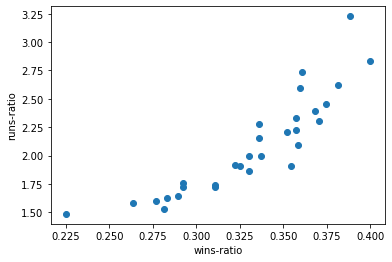

In [20]:
plt.scatter(wins_ratio,runs_ratio)
plt.xlabel("wins-ratio")
plt.ylabel("runs-ratio")

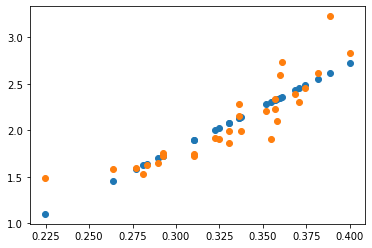

In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(wins_ratio.reshape(-1,1),runs_ratio)
y=lr.predict(wins_ratio.reshape(-1,1))
plt.scatter(wins_ratio,y,label="linear fit")
plt.scatter(wins_ratio,runs_ratio,label="data")

In [22]:
np.mean((y-runs_ratio)**2)

0.03964714328027332

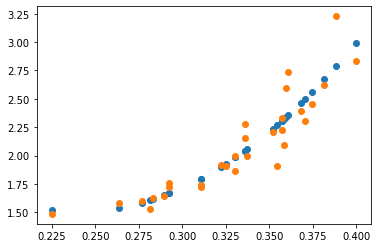

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(wins_ratio.reshape(-1,1),runs_ratio)
y=polyreg.predict(wins_ratio.reshape(-1,1))
plt.scatter(wins_ratio,y,label="linear fit")
plt.scatter(wins_ratio,runs_ratio,label="data")

In [24]:
np.mean((y-runs_ratio)**2)

0.026208315776256652

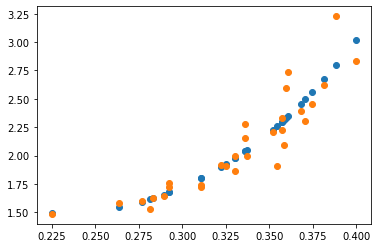

In [25]:
degree=3
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(wins_ratio.reshape(-1,1),runs_ratio)
y=polyreg.predict(wins_ratio.reshape(-1,1))
plt.scatter(wins_ratio,y,label="linear fit")
plt.scatter(wins_ratio,runs_ratio,label="data")

In [26]:
np.mean((y-runs_ratio)**2)

0.026135708346051247

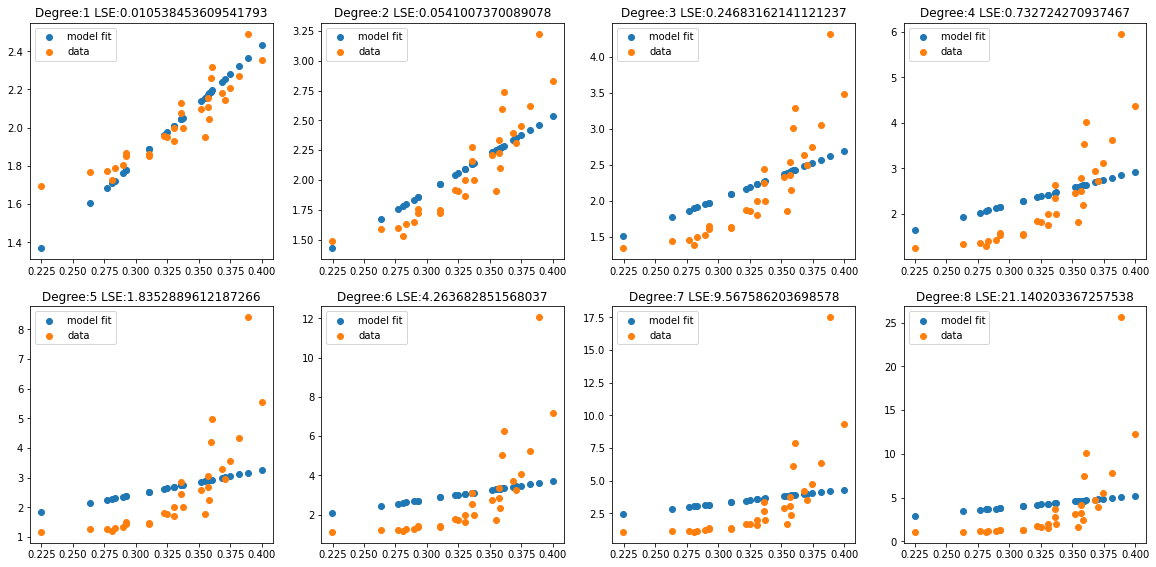

In [35]:
error=[]
plt.figure(figsize=(20,20))
for j in range(1,9):
  degree=j
  wins_ratio=[]
  runs_ratio=[]
  for i in range(len(data2)):
    d1=list(data1.loc[i])
    d2=list(data2.loc[i])
    wins_ratio.append((d1[1]+d2[1])/(d1[1]+d2[1]+d1[4]+d2[4]))
    runs_ratio.append(1/1+(((d1[2]+d2[3])/(d2[2]+d1[3]))**j))
  wins_ratio=np.array(wins_ratio)
  polyreg=LinearRegression(fit_intercept=False)
  polyreg.fit((wins_ratio.reshape(-1,1)),runs_ratio)
  y=polyreg.predict(wins_ratio.reshape(-1,1))
  plt.subplot(4,4,j)
  plt.scatter(wins_ratio,y,label="model fit")
  plt.scatter(wins_ratio,runs_ratio,label="data")
  err_cur=np.mean((y-runs_ratio)**2)
  error.append(err_cur)
  plt.title("Degree:"+str(j)+" LSE:"+str(err_cur))
  plt.legend()
plt.show()

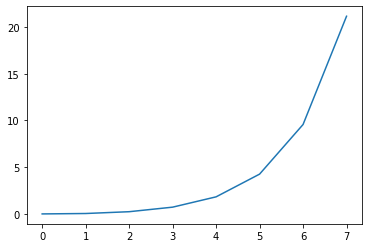

In [36]:
plt.plot(error)
plt.show()